# Color Image Classification

## #1 Load Dataset

In [41]:
import keras
from keras.datasets import cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [42]:
print(x_train.shape)
print(y_train.shape)
print('---')
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
---
(10000, 32, 32, 3)
(10000, 1)


In [43]:
import cv2
import numpy as np
X_train = np.zeros((6000,227,227,3))
X_test = np.zeros((100,227,227,3))

for i in range(6000):
    X_train[i] = cv2.resize(x_train[i],(227,227))
    if i < 100:
        X_test[i] = cv2.resize(x_test[i],(227,227))


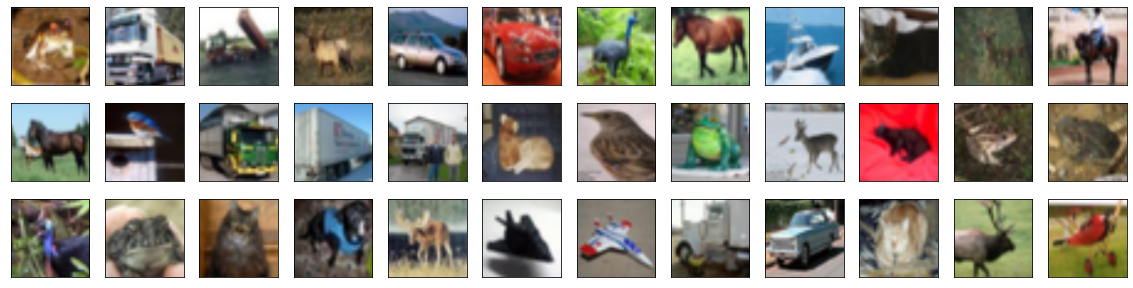

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]).astype(np.uint8))


## #2 Image Preprocessing

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [44]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [45]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [46]:
(X_train, X_valid) = X_train[1000:6000], X_train[:1000]
(y_train, y_valid) = y_train[1000:6000], y_train[:1000]
y_test = y_test[:100]
print('X_train shape:', X_train.shape)

print('training data : ',X_train.shape[0])
print('test data : ',X_test.shape[0])
print('validation data : ',X_valid.shape[0])


X_train shape: (5000, 227, 227, 3)
training data :  5000
test data :  100
validation data :  1000


## #3 Define Model Architecture

### Simple AlexNet

### CNN : INPUT => CONV_1 => POOL_1 => CONV_2 => POOL_2 => CONV_3 => POOL_3 => DO => FC => DO => FC(softmax)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2,padding='same',
                 activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2,padding='same',
                 activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2,padding='same',
                 activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))

model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                        

2022-08-04 18:07:59.762432: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-04 18:07:59.762529: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### AlexNet

### CNN : INPUT => CONV_1 => POOL_2 => CONV_3 => POOL_4 => CONV_5 => CONV_6 => CONV_7 => POOL_8 => FC9 => FC10 => SOFTMAX

In [32]:
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Conv2D, AveragePooling2D, Dropout, Flatten, Dense, Activation, MaxPool2D, BatchNormalization

model_AlexNet = Sequential()

# Conv 1
model_AlexNet.add(Conv2D(filters=96, kernel_size=(11,11),strides=(4,4),padding='valid',\
                    input_shape=(227,227,3)))
model_AlexNet.add(Activation('relu'))
# Pool 2
model_AlexNet.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model_AlexNet.add(BatchNormalization())

# Conv 3
model_AlexNet.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same',\
                    kernel_regularizer=l2(0.0005)))
model_AlexNet.add(Activation('relu'))
# Pool 4
model_AlexNet.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model_AlexNet.add(BatchNormalization())

# Conv 5
model_AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same',\
                    kernel_regularizer=l2(0.0005)))
model_AlexNet.add(Activation('relu'))
model_AlexNet.add(BatchNormalization())

# Conv 6
model_AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same',\
                    kernel_regularizer=l2(0.0005)))
model_AlexNet.add(Activation('relu'))
model_AlexNet.add(BatchNormalization())

# Conv 7
model_AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same',\
                    kernel_regularizer=l2(0.0005)))
model_AlexNet.add(Activation('relu'))
model_AlexNet.add(BatchNormalization())
# Pool 8
model_AlexNet.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flatten
model_AlexNet.add(Flatten())

# FC 9
model_AlexNet.add(Dense(units=4096, activation='relu'))
model_AlexNet.add(Dropout(0.5))

# FC 10
model_AlexNet.add(Dense(units=4096, activation='relu'))
model_AlexNet.add(Dropout(0.5))

# Softmax
model_AlexNet.add(Dense(units=10, activation='softmax'))

model_AlexNet.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 activation_10 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_10 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 activation_11 (Activation)  (None, 27, 27, 256)      

## #4 Model Compile

In [33]:
model_AlexNet.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## #5 Model Training

In [34]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model_AlexNet_32.weights.best.hdf5', verbose=1,
                               save_best_only=True)

hist = model_AlexNet.fit(X_train,y_train, batch_size=32, epochs=30,
                 validation_data=(X_valid,y_valid), callbacks=[checkpointer],
                 verbose=2, shuffle=True)


Epoch 1/30


2022-08-04 19:08:31.445722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-04 19:08:56.762152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 3.90704, saving model to model_AlexNet_32.weights.best.hdf5
157/157 - 27s - loss: 13.2047 - accuracy: 0.1590 - val_loss: 3.9070 - val_accuracy: 0.1630 - 27s/epoch - 174ms/step
Epoch 2/30

Epoch 2: val_loss improved from 3.90704 to 2.56397, saving model to model_AlexNet_32.weights.best.hdf5
157/157 - 24s - loss: 2.9531 - accuracy: 0.1968 - val_loss: 2.5640 - val_accuracy: 0.2670 - 24s/epoch - 150ms/step
Epoch 3/30

Epoch 3: val_loss improved from 2.56397 to 2.38683, saving model to model_AlexNet_32.weights.best.hdf5
157/157 - 23s - loss: 2.5417 - accuracy: 0.2384 - val_loss: 2.3868 - val_accuracy: 0.2120 - 23s/epoch - 149ms/step
Epoch 4/30

Epoch 4: val_loss improved from 2.38683 to 2.19648, saving model to model_AlexNet_32.weights.best.hdf5
157/157 - 23s - loss: 2.3335 - accuracy: 0.2630 - val_loss: 2.1965 - val_accuracy: 0.2680 - 23s/epoch - 149ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 2.19648
157/157 - 23s - loss: 2.2349 - accu

## #6 Use Best weights

In [14]:
model_AlexNet.load_weights('model_AlexNet_32.weights.best.hdf5')

## #7 Model Evaluate

In [47]:
score = model_AlexNet.evaluate(X_test, y_test, verbose=0)


In [48]:
score

[2.3415627479553223, 0.38999998569488525]

---
---

# Improve Model

## Import Library

In [54]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers

import numpy as np
from matplotlib import pyplot as plt

## Load Data

In [55]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [56]:
# train = 50000
print('x_train =', x_train.shape)
print('x_valid =', x_valid.shape)

# test = 10000
print('x_test =', x_test.shape)

x_train = (45000, 32, 32, 3)
x_valid = (5000, 32, 32, 3)
x_test = (10000, 32, 32, 3)


### Data Regularization

In [57]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))
x_train = (x_train - mean) / (std+1e-7)
x_valid = (x_valid - mean) / (std+1e-7)
x_test = (x_test - mean) / (std+1e-7)

### One-hot Encoding

In [58]:
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_valid = np_utils.to_categorical(y_valid, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

### Data Reinforcement

In [59]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

## Define Model

In [62]:
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Conv2D, AveragePooling2D, Dropout, Flatten, Dense, Activation, MaxPool2D, BatchNormalization

model = Sequential()

# Conv 1
model.add(Conv2D(filters=96, kernel_size=(4,4),strides=(2,2),padding='valid',\
                    input_shape=(32,32,3)))
model.add(Activation('relu'))
# Pool 2
model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

# Conv 3
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same',\
                    kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
# Pool 4
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Conv 5
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same',\
                    kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Conv 6
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same',\
                    kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Conv 7
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same',\
                    kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
# Pool 8
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flatten
model.add(Flatten())

# FC 9
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

# FC 10
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.5))

# Softmax
model.add(Dense(units=10, activation='softmax'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 15, 15, 96)        4704      
                                                                 
 activation_20 (Activation)  (None, 15, 15, 96)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 96)         0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 7, 7, 96)         384       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 256)         221440    
                                                                 
 activation_21 (Activation)  (None, 7, 7, 256)        

# Train Model

In [63]:
batch_size = 128
epochs = 90

checkpointer = ModelCheckpoint(filepath='model.100epochs.hdf5',verbose=1,\
                                save_best_only=True)
optimizer = optimizers.Adam(epsilon=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                              callbacks=[checkpointer],
                              steps_per_epoch=x_train.shape[0]//batch_size,
                              epochs=epochs,
                              verbose=2, validation_data=(x_valid,y_valid))


Epoch 1/90


/var/folders/0l/3n3y7jns43l8x_lzc7n9yhqh0000gn/T/ipykernel_28644/441818333.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
2022-08-04 19:25:38.169696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-04 19:25:55.414678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.87226, saving model to model.100epochs.hdf5
351/351 - 20s - loss: 2.2495 - accuracy: 0.3867 - val_loss: 1.8723 - val_accuracy: 0.4606 - 20s/epoch - 57ms/step
Epoch 2/90

Epoch 2: val_loss improved from 1.87226 to 1.54205, saving model to model.100epochs.hdf5
351/351 - 16s - loss: 1.6092 - accuracy: 0.5414 - val_loss: 1.5420 - val_accuracy: 0.5734 - 16s/epoch - 47ms/step
Epoch 3/90

Epoch 3: val_loss improved from 1.54205 to 1.38163, saving model to model.100epochs.hdf5
351/351 - 16s - loss: 1.4111 - accuracy: 0.6012 - val_loss: 1.3816 - val_accuracy: 0.6044 - 16s/epoch - 47ms/step
Epoch 4/90

Epoch 4: val_loss improved from 1.38163 to 1.21047, saving model to model.100epochs.hdf5
351/351 - 16s - loss: 1.3251 - accuracy: 0.6357 - val_loss: 1.2105 - val_accuracy: 0.6740 - 16s/epoch - 47ms/step
Epoch 5/90

Epoch 5: val_loss improved from 1.21047 to 1.20823, saving model to model.100epochs.hdf5
351/351 - 16s - loss: 1.2873 - accuracy: 0.6621 - val_

In [64]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 1s 13ms/step - loss: 0.9390 - accuracy: 0.7733

Test result: 77.330 loss: 0.939


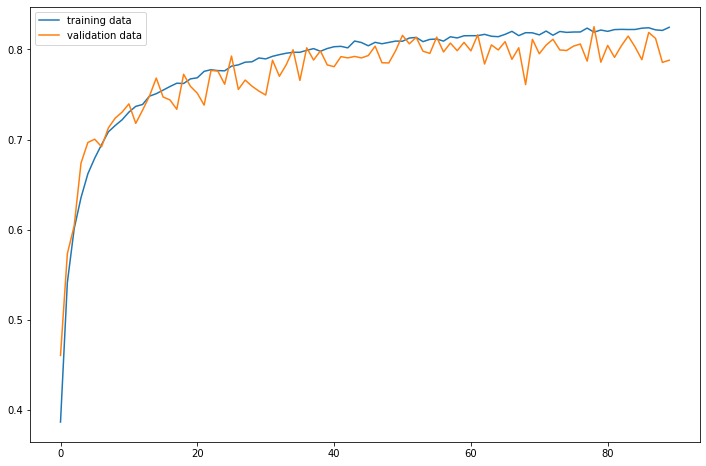

In [65]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'],label='validation data')
plt.legend()
plt.show()